# Análisis del conjunto Breast Cancer Wisconsin (Original)

## Descripción:

In [ ]:
En este ejemplo se muestra como usar PCA para mejorar la clasificación de un conjunto de datos

## Procedimiento:

### Instalar los packages necesarios en caso de no haberlo hecho anteriormente

In [ ]:
#install.packages("rpart")
#install.packages("rpart.plot")
#install.packages("car")
#install.packages("caret")
#install.packages("e1071")
#install.packages("psych")

### Importar los packages necesarios

In [27]:
require(rpart)
require(rpart.plot)
require(car)
require(caret)
require(e1071)
require(psych)

### Leer el conjunto de datos original desde su URL en el repositorio UCI Machine Learning

In [6]:
wdbc=read.table(
    url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"), 
    sep=",", header=FALSE)

### Obtener las dimensiones (N y d) del conjunto de datos

In [5]:
dim(wdbc)

[1] 699  11

### Recodificar los '?' por NA y quedarse solo con los registros completos

In [7]:
wdbc$V7=as.numeric(recode(wdbc$V7, "'?'=NA"))
x=wdbc[complete.cases(wdbc),]

### Particionar el conjunto de entrada en dos (training y test set), según la regla del 2/3

In [9]:
N=dim(x)[1]
all=seq(1,N)

# seleccionar 2/3 al azar

train=sort(sample(N,N*2/3.0))
test=setdiff(all,train)

xtrain=x[train,]
xtest=x[test,]

### Crear un primer árbol usando todos los parámetros por defecto y dibujarlo

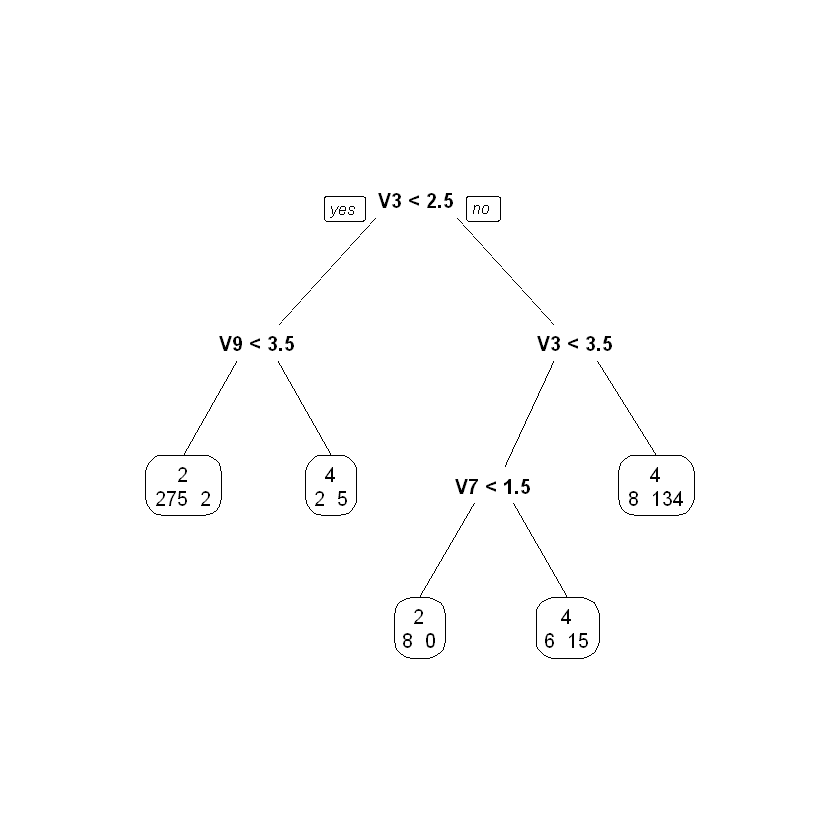

In [10]:
t1=rpart(as.factor(V11) ~ V2+V3+V4+V5+V6+V7+V8+V9+V10, 
         data=xtrain, method="class")

prp(t1, extra=1)

### Evaluar el árbol creado mediante la matriz de confusión para cada subconjunto

In [14]:
y1train=predict(t1, xtrain, type="class")
cm1train=confusionMatrix(table(xtrain$V11,y1train))
print(cm1train)

y1test=predict(t1, xtest, type="class")
cm1test=confusionMatrix(table(xtest$V11,y1test))
print(cm1test)

Confusion Matrix and Statistics

   y1train
      2   4
  2 283  16
  4   2 154
                                          
               Accuracy : 0.9604          
                 95% CI : (0.9382, 0.9764)
    No Information Rate : 0.6264          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9141          
 Mcnemar's Test P-Value : 0.002183        
                                          
            Sensitivity : 0.9930          
            Specificity : 0.9059          
         Pos Pred Value : 0.9465          
         Neg Pred Value : 0.9872          
             Prevalence : 0.6264          
         Detection Rate : 0.6220          
   Detection Prevalence : 0.6571          
      Balanced Accuracy : 0.9494          
                                          
       'Positive' Class : 2               
                                          
Confusion Matrix and Statistics

   y1test
      2   4
  2 1

#### PREGUNTA: ¿Qué valores determinan la calidad del árbol construido?

#### SOLUCIÓN:

### Utilizar PCA para extraer características, analizando visualmente el número de componentes

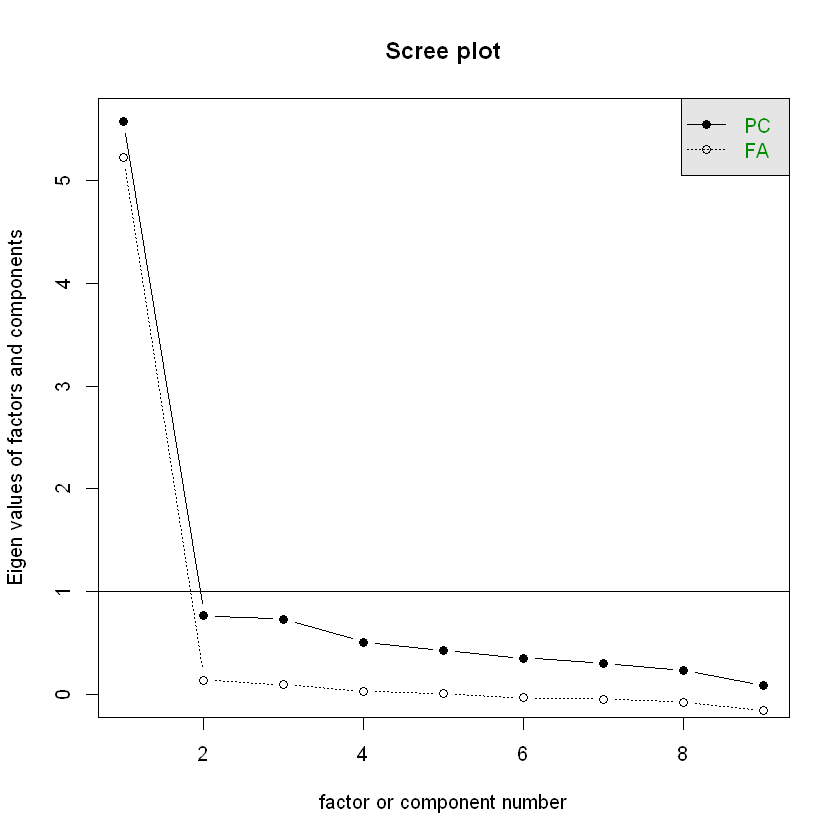

In [26]:
scree(xtrain[,2:10])

#### PREGUNTA: ¿Cuantos componentes se deberían utilizar como nuevas características y porqué?

#### SOLUCIÓN: 

### Usar solo el primer componente sin ninguna rotación

In [19]:
pca=principal(xtrain[,2:10],nfactors=1,rotate="none")
print(pca)

Principal Components Analysis
Call: principal(r = xtrain[, 2:10], nfactors = 1, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
     PC1   h2   u2 com
V2  0.72 0.52 0.48   1
V3  0.93 0.87 0.13   1
V4  0.91 0.82 0.18   1
V5  0.79 0.62 0.38   1
V6  0.83 0.70 0.30   1
V7  0.56 0.31 0.69   1
V8  0.84 0.71 0.29   1
V9  0.83 0.69 0.31   1
V10 0.57 0.33 0.67   1

                PC1
SS loadings    5.57
Proportion Var 0.62

Mean item complexity =  1
Test of the hypothesis that 1 component is sufficient.

The root mean square of the residuals (RMSR) is  0.06 
 with the empirical chi square  107.95  with prob <  1.2e-11 

Fit based upon off diagonal values = 0.99

### Añadir una nueva variable C1 a los datos usando el componente calculado

In [21]:
xtrain$C1=predict(pca,xtrain[,2:10])[,1]
xtest$C1=predict(pca,xtest[,2:10])[,1]

### Crear un segundo árbol con la nueva variable usando todos los parámetros por defecto y dibujarlo

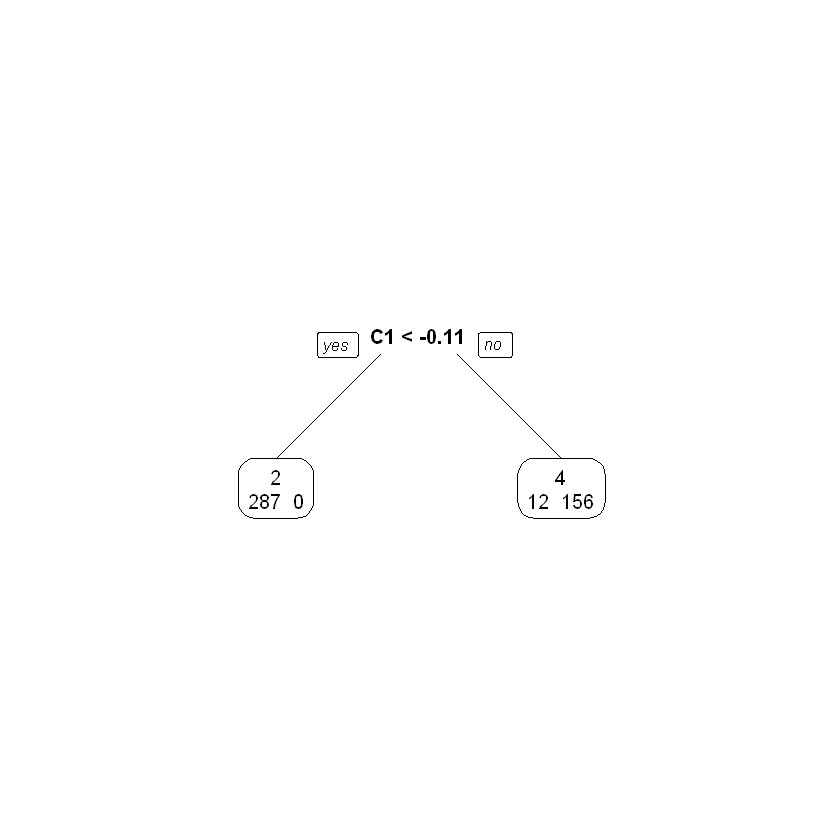

In [22]:
t2=rpart(as.factor(V11) ~ V2+V3+V4+V5+V6+V7+V8+V9+V10+C1, 
         data=xtrain, method="class")

prp(t2, extra=1)


### Evaluar el árbol creado mediante la matriz de confusión para cada subconjunto

In [23]:
y2train=predict(t2, xtrain, type="class")
cm2train=confusionMatrix(table(xtrain$V11,y2train))
print(cm2train)

y2test=predict(t2, xtest, type="class")
cm2test=confusionMatrix(table(xtest$V11,y2test))
print(cm2test)

Confusion Matrix and Statistics

   y2train
      2   4
  2 287  12
  4   0 156
                                          
               Accuracy : 0.9736          
                 95% CI : (0.9544, 0.9863)
    No Information Rate : 0.6308          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9425          
 Mcnemar's Test P-Value : 0.001496        
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9286          
         Pos Pred Value : 0.9599          
         Neg Pred Value : 1.0000          
             Prevalence : 0.6308          
         Detection Rate : 0.6308          
   Detection Prevalence : 0.6571          
      Balanced Accuracy : 0.9643          
                                          
       'Positive' Class : 2               
                                          
Confusion Matrix and Statistics

   y2test
      2   4
  2 1

### Forzar la construcción de un tercer árbol completo mediante los parámetros de la función rpart

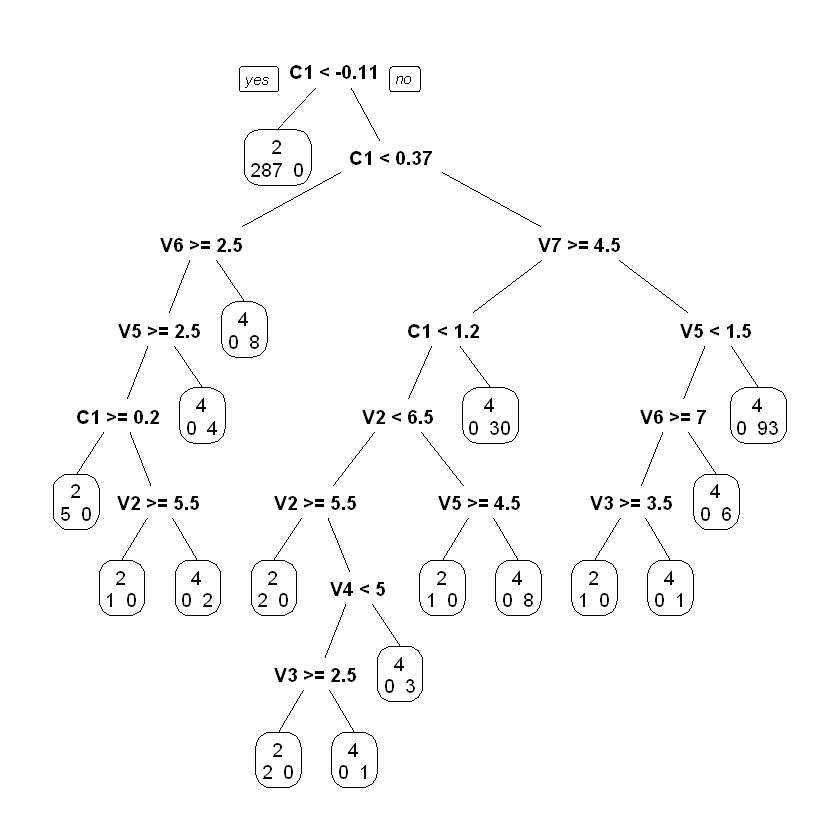

In [24]:
t3=rpart(as.factor(V11) ~ V2+V3+V4+V5+V6+V7+V8+V9+V10+C1, 
         data=xtrain, method="class", 
         control=rpart.control(minsplit=0, cp=0.0))

prp(t3, extra=1)

### Evaluar el árbol creado mediante la matriz de confusión para cada subconjunto

In [25]:
y3train=predict(t3, xtrain, type="class")
cm3train=confusionMatrix(table(xtrain$V11,y3train))
print(cm3train)

y3test=predict(t3, xtest, type="class")
cm3test=confusionMatrix(table(xtest$V11,y3test))
print(cm3test)

Confusion Matrix and Statistics

   y3train
      2   4
  2 299   0
  4   0 156
                                     
               Accuracy : 1          
                 95% CI : (0.9919, 1)
    No Information Rate : 0.6571     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.6571     
         Detection Rate : 0.6571     
   Detection Prevalence : 0.6571     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 2          
                                     
Confusion Matrix and Statistics

   y3test
      2   4
  2 142   3
  4   5  78
                                         
               Accuracy : 0.9649       

#### PREGUNTA: ¿Qué arbol es mejor y porqué, t2 o t3?

#### RESPUESTA: 